In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
query_url = 'https://api.ed.gov/data/mbk-college-enrollment?'
api_key = 'api_key=bVIf4sU0IzjYfs473ZQEyzOjmZ5hkWeG6vdk5vPc'
per_page = 'per_page=' + '336'
full_url = query_url + api_key + "&" + per_page

CE_data = requests.get(full_url).json()

pprint(CE_data)

{'pagination': {'count': 336, 'page': 1, 'pages': 1, 'per_page': 336},
 'resources': [{'Characteristic': 'Total ',
                'Count': '9452',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '35.5',
                'Race/ethnicity': 

                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '41.3',
                'Race/ethnicity': None,
                'Sex': 'Female',
                'Standard Error on Count': '107.53',
                'Standard Error on Percentage': '0.61',
                'Year': '2003',
                'index': 31},
               {'Characteristic': 'Total - Female',
                'Count': '5746',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
           

                'Standard Error on Percentage': '1.01',
                'Year': '2009',
                'index': 79},
               {'Characteristic': 'Total - Hispanic',
                'Count': '1814',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
               

               {'Characteristic': 'Total - American Indian/Alaska Native, '
                                  'non-Hispanic',
                'Count': '54',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '23.5',
                'Race/eth

                'Standard Error on Percentage': '1.27',
                'Year': '2003',
                'index': 171},
               {'Characteristic': 'Total - Male, Hispanic',
                'Count': '574',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
         

               {'Characteristic': 'Total - Male, American Indian/Alaska '
                                  'Native, non-Hispanic',
                'Count': None,
                'Note on Count': 'Reporting standards not met. Either there '
                                 'are too few cases for a reliable estimate or '
                                 'the coefficient of variation (CV) is 50 '
                                 'percent or greater. Data are based on '
                                 'samples surveys of the civilian '
                                 'noninstitutional population. Race categories '
                                 'exclude persons of Hispanic ethnicity. Data '
                                 'for persons of two or more races collected '
                                 'separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
 

                'Standard Error on Percentage': '1.59',
                'Year': '2008',
                'index': 260},
               {'Characteristic': 'Total - Female, Black, non-Hispanic',
                'Count': '912',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002

                'Sex': 'Female',
                'Standard Error on Count': None,
                'Standard Error on Percentage': '10.9',
                'Year': '2010',
                'index': 304},
               {'Characteristic': 'Total - Female, Pacific Islander, '
                                  'non-Hispanic',
                'Count': None,
                'Note on Count': 'Reporting standards not met. Either there '
                                 'are too few cases for a reliable estimate or '
                                 'the coefficient of variation (CV) is 50 '
                                 'percent or greater. Data are based on '
                                 'samples surveys of the civilian '
                                 'noninstitutional population. Race categories '
                                 'exclude persons of Hispanic ethnicity. Data '
                                 'for persons of two or more races collected '
                              

In [3]:
length = len(CE_data['resources'])
#length

In [4]:
#collect data for list
percentage=[]
year=[]
race=[]
sex=[]
count=[]
percentage=[]

for a in range(length):
    year.append(int(CE_data['resources'][a]['Year']))
    sex.append(CE_data['resources'][a]['Sex'])
    race.append(CE_data['resources'][a]['Race/ethnicity'])
    percentage.append(CE_data['resources'][a]['Percentage'])
    count.append(CE_data['resources'][a]['Count'])

In [5]:
CE_race = pd.DataFrame({'Year': year, 'Race': race, 'Count': count, 'Percentage': percentage})

CE_gender = pd.DataFrame({'Year': year, 'Sex': sex, 'Count': count, 'Percentage': percentage})

#CE_gender.head()

In [6]:
#replace Race values to other
CE_race_2 = CE_race.replace(to_replace=['Asian, non-Hispanic', 'Pacific Islander, non-Hispanic','American Indian/Alaska Native, non-Hispanic', 'Two or more races, non-Hispanic'], value = 'Other')
CE_race_3 = CE_race_2.replace(to_replace=['White, non-Hispanic', 'Black, non-Hispanic'], value=['Caucasian', 'African-American'])
CE_race_3['Race'].unique()

#CE_race_3['Race'].unique()


array([None, 'Caucasian', 'African-American', 'Hispanic', 'Other'],
      dtype=object)

In [7]:
CE_race_3 = CE_race_3.dropna(how='any')
CE_gender = CE_gender.dropna(how='any')

CE_race_3['Percentage'] = CE_race_3['Percentage'].astype(float)
CE_race_3['Count'] = CE_race_3['Count'].astype(float)
CE_gender['Percentage'] = CE_gender['Percentage'].astype(float)
CE_gender['Count'] = CE_gender['Count'].astype(float)

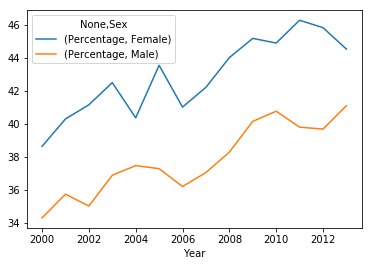

In [8]:
#preliminary graphs - gender
CE_gender_final = pd.DataFrame(CE_gender.groupby(['Year', 'Sex'])['Percentage'].mean())
CE_gender_final.unstack(level=-1).plot(kind='line')

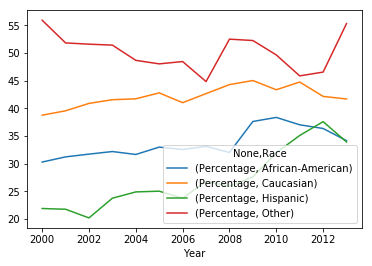

In [9]:
#preliminary graphs - gender
CE_race_final = pd.DataFrame(CE_race_3.groupby(['Year', 'Race'])['Percentage'].mean())
CE_race_final.unstack(level=-1).plot(kind='line')

In [10]:
#export dataframes to excel
CE_race_final.to_csv(r'C:\Users\Paola\Downloads\GroupProject_Team5-by-5-master\GroupProject_Team5-by-5-master\cleaning\College_Enrollment_Rate_by_Race.csv', index=None)
CE_gender_final.to_csv(r'C:\Users\Paola\Downloads\GroupProject_Team5-by-5-master\GroupProject_Team5-by-5-master\cleaning\College_Enrollment_Rate_by_Gender.csv', index=None)
